In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model  = tf.keras.models.Sequential()

In [3]:
model.add(tf.keras.layers.Conv2D(128,strides=2,kernel_size=3,padding='same',input_shape=(28,28,1)))

In [4]:
model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(128,3,2,'same'))

In [5]:
model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [6]:
opt = tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics =['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       1280      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [8]:
(x_train, _),(_ , _) = tf.keras.datasets.mnist.load_data()
x = np.expand_dims(x_train, axis=-1)
x = x.astype('float32')
x = x/255.
# print(x[1])

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
import numpy as np
x.shape

(60000, 28, 28, 1)

In [10]:
def real_samps(n_samps):
  ix = np.random.randint(0, x.shape[0], n_samps)
  X = x[ix]
  y = np.ones((n_samps,1))
  return X, y

In [11]:
def fake_samples(n_samps):
  rands = np.random.rand(28*28*n_samps)
  rands = rands.reshape((n_samps,28,28,1))
  y = np.zeros((n_samps,1))
  return rands, y

In [12]:
def train_model(model, x_train,n_iter=100, n_batch=128):
  for i in range(n_iter):
    x_real, y_real = real_samps(n_batch)
    x_fake, y_fake = fake_samples(n_batch)
    _, real_acc = model.train_on_batch(x_real, y_real)
    _, fake_acc = model.train_on_batch(x_fake, y_fake)
    print("Accuray of fake is {:.2f}% and Accuracy of Real is {:.2f}, at {:d}".format(fake_acc*100,real_acc*100,i+1))

In [13]:
train_model(model, x)

Accuray of fake is 4.69% and Accuracy of Real is 15.62, at 1
Accuray of fake is 99.22% and Accuracy of Real is 77.34, at 2
Accuray of fake is 100.00% and Accuracy of Real is 63.28, at 3
Accuray of fake is 100.00% and Accuracy of Real is 65.62, at 4
Accuray of fake is 100.00% and Accuracy of Real is 66.41, at 5
Accuray of fake is 100.00% and Accuracy of Real is 80.47, at 6
Accuray of fake is 100.00% and Accuracy of Real is 96.09, at 7
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 8
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 9
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 10
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 11
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 12
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 13
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 14
Accuray of fake is 100.00% and Accuracy of Real is 100.00, at 15
Accuray of fake is 100.00% and Accuracy of R

In [14]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(128*7*7, input_dim=200))
model2.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model2.add(tf.keras.layers.Reshape((7,7,128)))

In [15]:
model2.add(tf.keras.layers.Conv2DTranspose(128,4 ,2,'same'))
model2.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [16]:
model2.add(tf.keras.layers.Conv2DTranspose(128,4,2,'same'))
model2.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model2.add(tf.keras.layers.Conv2D(1,7,activation='sigmoid',padding='same'))

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              1260672   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 128)      

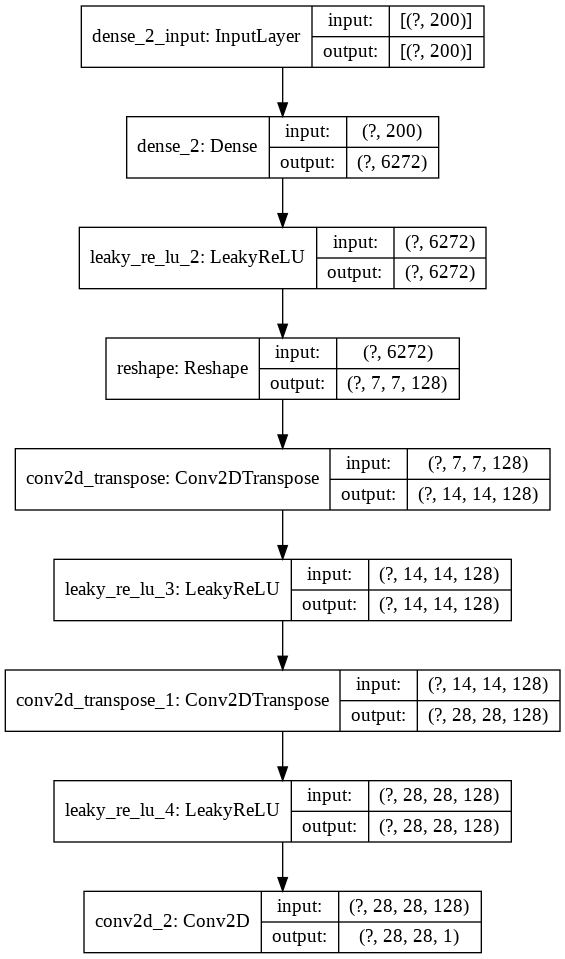

In [18]:
tf.compat.v1.keras.utils.plot_model(model2, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
def gen_latent_dim(latent_dim, n_samps):
  x_in = np.random.randn(latent_dim*n_samps)
  x_in = x_in.reshape(n_samps, latent_dim)
  return x_in

In [20]:
def gen_l_fake(model,latent_dim, n_samps):
  x_in = gen_latent_dim(latent_dim, n_samps)
  x_in = model.predict(x_in)
  y = np.zeros((n_samps,1))
  return x_in, y

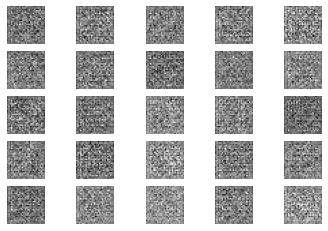

In [21]:
latent_dim = 200
n_samps = 25
pesudoran,_ = gen_l_fake(model2, latent_dim,n_samps)
for i in range(n_samps):
  plt.subplot(5,5,1+i)
  plt.axis('off')
  plt.imshow(pesudoran[i,:,:,0],cmap='gray_r')
plt.show()

In [22]:
model.trainable = False
final_model= tf.keras.models.Sequential()
final_model.add(model2)
final_model.add(model)
final_model.compile(loss='binary_crossentropy',optimizer=opt)

In [23]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         1791489   
_________________________________________________________________
sequential (Sequential)      (None, 1)                 951937    
Total params: 2,743,426
Trainable params: 1,791,489
Non-trainable params: 951,937
_________________________________________________________________


In [24]:
def final_train(gan, latent_dim, eps = 100, n_batch = 128):
  for i in range(eps):
    x_gan = gen_latent_dim(latent_dim, n_batch*2)
    y_gan = np.ones((n_batch*2, 1))
    gan.train_on_batch(x_gan, y_gan)

In [25]:
  def train(gm, dm, gan, dataset, latent_dim, eps = 100, n_batch = 256):
    img_per_ep = int(dataset.shape[0]/ n_batch)
    for i in range(eps):
      for j in range(img_per_ep):
        x_real, y_real = real_samps(int(n_batch/2))
        x_fake, y_fake = gen_l_fake(gm, latent_dim, int(n_batch/2))
        x, y = np.vstack((x_real, x_fake)), np.vstack((y_real,y_fake))
        d_loss = dm.train_on_batch(x, y)
        gan_x = gen_latent_dim(latent_dim, int(n_batch/2))
        y_gan = np.ones((int(n_batch/2),1))
        g_loss = gan.train_on_batch(gan_x, y_gan)
        print(g_loss, d_loss, i+1, j+1)

In [26]:
train(model2, model, final_model,x,200,210)

Streaming output truncated to the last 5000 lines.
1.2722957134246826 [0.5092931985855103, 0.76171875] 79 150
1.27531099319458 [0.5611823797225952, 0.69921875] 79 151
1.0230814218521118 [0.5158052444458008, 0.7421875] 79 152
1.0733473300933838 [0.5701086521148682, 0.671875] 79 153
1.20659339427948 [0.5364176034927368, 0.7265625] 79 154
1.1857980489730835 [0.5235173106193542, 0.74609375] 79 155
1.1777390241622925 [0.5673214197158813, 0.71484375] 79 156
1.0772037506103516 [0.5151482224464417, 0.75] 79 157
0.9892300367355347 [0.5607228875160217, 0.7265625] 79 158
1.1562036275863647 [0.6030763983726501, 0.6640625] 79 159
1.151008129119873 [0.5492918491363525, 0.703125] 79 160
1.0147379636764526 [0.5659438967704773, 0.68359375] 79 161
1.1641221046447754 [0.5193801522254944, 0.7421875] 79 162
1.0340855121612549 [0.47685256600379944, 0.78515625] 79 163
1.137544870376587 [0.5509390234947205, 0.72265625] 79 164
1.3614730834960938 [0.5564799308776855, 0.70703125] 79 165
1.287623643875122 [0.5295

In [27]:
def save_plot(exps, n):
  for i in range(n*n):
    plt.subplot(n,n,1+i)
    plt.axis('off')
    plt.imshow(exps[i,:,:,0],cmap='gray_r')
  plt.show()

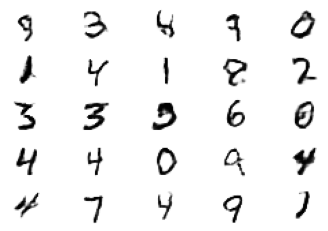

In [31]:
save_plot(model2.predict(gen_latent_dim(200,25)),5) # These are generated images cool

In [ ]:
(X_train,_),(_,_) = tf.keras.datasets.cifar100.load_data()

In [ ]:
plt.imshow(X_train[1])

In [ ]:
def real_samps_cifr(x,n_samps):
  ix = np.random.randint(0, x.shape[0], n_samps)
  X = x[ix]
  y = np.ones((n_samps,1))
  return X, y

In [ ]:
def fake_samples_cifr(n_samps):
  rands = np.random.rand(32*32*n_samps*3)
  rands = rands.reshape((n_samps,32,32,3))
  y = np.zeros((n_samps,1))
  return rands, y

In [ ]:
def train_model_2(model, x_train,n_iter=100, n_batch=128):
  for i in range(n_iter):
    x_real, y_real = real_samps_cifr(X_train,n_batch)
    x_fake, y_fake = fake_samples_cifr(n_batch)
    _, real_acc = model.train_on_batch(x_real, y_real)
    _, fake_acc = model.train_on_batch(x_fake, y_fake)
    print("Accuray of fake is {:.2f}% and Accuracy of Real is {:.2f}, at {:d}".format(fake_acc*100,real_acc*100,i+1))

In [ ]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(256,strides=2,kernel_size=3,padding='same',input_shape=(32,32,3)))
model_2.add(tf.keras.layers.LeakyReLU(0.2))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Conv2D(256,3,2,'same'))


In [ ]:
model_2.add(tf.keras.layers.LeakyReLU(0.2))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(256,activation='relu'))
model_2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
model_2.compile(loss='binary_crossentropy', optimizer=opt, metrics =['accuracy'])

In [ ]:
train_model_2(model_2, X_train)

In [ ]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 16, 16, 256)       7168      
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)           

In [ ]:
model2_1 = tf.keras.models.Sequential()
model2_1.add(tf.keras.layers.Dense(256*8*8, input_dim=200))
model2_1.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model2_1.add(tf.keras.layers.Reshape((8,8,256)))

In [ ]:
model2_1.add(tf.keras.layers.Conv2DTranspose(256,2,2,'same'))
model2_1.add(tf.keras.layers.LeakyReLU(alpha=0.2))

In [ ]:
model2_1.add(tf.keras.layers.Conv2DTranspose(256,2,2,'same'))
model2_1.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model2_1.add(tf.keras.layers.Conv2DTranspose(256,1,2,'same'))
model2_1.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model2_1.add(tf.keras.layers.Conv2D(3,3,2,activation='sigmoid',padding='same'))
# model2_1.add(tf.keras.layers.Conv2D(3,3,activation='tanh',padding='same'))

In [ ]:
model2_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16384)             3293184   
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 16384)             0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 16, 16, 256)       262400    
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 32, 32, 256)       262400    
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 32, 32, 256)     

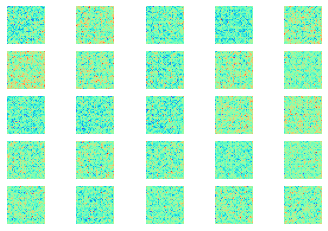

In [ ]:
latent_dim = 200
n_samps = 25
pesudoran,_ = gen_l_fake(model2_1, latent_dim,n_samps)
for i in range(n_samps):
  plt.subplot(5,5,1+i)
  plt.axis('off')
  plt.imshow(pesudoran[i,:,:,0],cmap='rainbow')
plt.show()

In [ ]:
model_2.trainable = False
final_model= tf.keras.models.Sequential()
final_model.add(model2_1)
final_model.add(model_2)
final_model.compile(loss='binary_crossentropy',optimizer=opt)

In [ ]:
final_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_17 (Sequential)   (None, 32, 32, 3)         3890691   
_________________________________________________________________
sequential_16 (Sequential)   (None, 1)                 4792065   
Total params: 8,682,756
Trainable params: 3,890,691
Non-trainable params: 4,792,065
_________________________________________________________________


In [ ]:
  def train(gm, dm, gan, dataset, latent_dim, eps = 100, n_batch = 256):
    img_per_ep = int(dataset.shape[0]/ n_batch)
    for i in range(eps):
      for j in range(img_per_ep):
        x_real, y_real = real_samps_cifr(dataset,int(n_batch/2))
        x_fake, y_fake = gen_l_fake(gm, latent_dim, int(n_batch/2))
        x, y = np.vstack((x_real, x_fake)), np.vstack((y_real,y_fake))
        d_loss = dm.train_on_batch(x, y)
        gan_x = gen_latent_dim(latent_dim, int(n_batch/2))
        y_gan = np.ones((int(n_batch/2),1))
        g_loss = gan.train_on_batch(gan_x, y_gan)
        print(g_loss, d_loss, i+1, j+1)

In [ ]:
train(model2_1,model_2,final_model,X_train,200,10)

Streaming output truncated to the last 5000 lines.
12.629393577575684 [1.843257678046939e-06, 1.0] 1 158
12.650373458862305 [1.6460792267025681e-06, 1.0] 1 159
12.637128829956055 [1.8062766002913122e-06, 1.0] 1 160
12.580842971801758 [1.7693857898848364e-06, 1.0] 1 161
12.61751651763916 [1.7697251450954354e-06, 1.0] 1 162
12.617206573486328 [1.7302600099355914e-06, 1.0] 1 163
12.64015007019043 [1.8179537164542126e-06, 1.0] 1 164
12.666488647460938 [1.7455754459660966e-06, 1.0] 1 165
12.619227409362793 [1.7583603266757564e-06, 1.0] 1 166
12.613834381103516 [1.7349539120914415e-06, 1.0] 1 167
12.617311477661133 [1.78234063241689e-06, 1.0] 1 168
12.628491401672363 [1.7095020439228392e-06, 1.0] 1 169
12.603607177734375 [1.6592205156484852e-06, 1.0] 1 170
12.649344444274902 [1.6880252360351733e-06, 1.0] 1 171
12.60342025756836 [1.7673414731689263e-06, 1.0] 1 172
12.622350692749023 [1.6743593960200087e-06, 1.0] 1 173
12.611300468444824 [1.791670911188703e-06, 1.0] 1 174
12.598564147949219 [1

KeyboardInterrupt: ignored

In [ ]:
  x = model2_1.predict(gen_latent_dim(200,1))

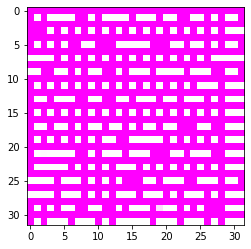

In [ ]:
plt.imshow(x[0])